In [22]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
%matplotlib inline

In [23]:
df1=pd.read_csv('Crime Rates & Funding Dataset.csv')
df2=pd.read_csv('Demographics Dataset.csv')
# Create derived variable, better correlation to crime
df2['25 only high school']=df2['% of People 25 Years+ with 4 or more Years of High School']-df2['% of people 25 years+ with at least 4 years of college']
df3=pd.merge(df1, df2, on='District ID ')

In [24]:
df3.columns

Index(['District ID ', 'Crime Rate \n(per 1M Residents)',
       'Violent Crime Rate (per 100K Residents)',
       'Annual Police Funding (Dollars per Resident)', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11',
       '% of People 25 Years+ with 4 or more Years of High School',
       '% of 16 to 19 year-olds not in highschool and not highschool graduates',
       '% of 18 to 24 year-olds in college',
       '% of people 25 years+ with at least 4 years of college',
       '25 only high school'],
      dtype='object')

In [7]:
df3.shape

(50, 17)

In [8]:
st.pearsonr(df3['Crime Rate \n(per 1M Residents)'], df3['% of 16 to 19 year-olds not in highschool and not highschool graduates'])

(0.32251867184634042, 0.022354665962212583)

In [9]:
st.pearsonr(df3['Crime Rate \n(per 1M Residents)'], df3['Annual Police Funding (Dollars per Resident)'])

(0.53319778550910424, 6.6990721098140273e-05)

In [10]:
# Very weak negative correlation
st.pearsonr(df3['Crime Rate \n(per 1M Residents)'], df3['% of People 25 Years+ with 4 or more Years of High School'])

(-0.13545932726733276, 0.34827096184251016)

In [11]:
# Correlation close to zero
st.pearsonr(df3['Crime Rate \n(per 1M Residents)'], df3['% of people 25 years+ with at least 4 years of college'])

(-0.026282669130029603, 0.85622851981132486)

In [12]:
# However, derived variable shows stronger negative correlation
st.pearsonr(df3['Crime Rate \n(per 1M Residents)'], df3['25 only high school'])

(-0.16242073259790576, 0.25976696085123374)

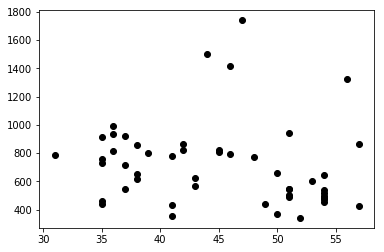

In [13]:
plt.scatter(df3['25 only high school'], df3['Crime Rate \n(per 1M Residents)'],  color='black')

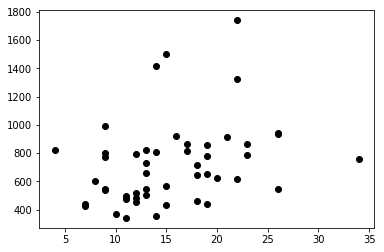

In [14]:
plt.scatter(df3['% of 16 to 19 year-olds not in highschool and not highschool graduates'], df3['Crime Rate \n(per 1M Residents)'],  color='black')

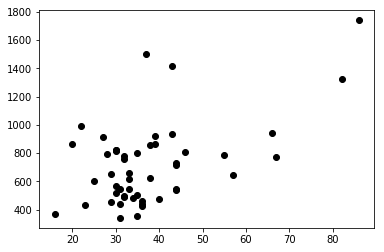

In [15]:
plt.scatter(df3['Annual Police Funding (Dollars per Resident)'], df3['Crime Rate \n(per 1M Residents)'],  color='black')

(array([ 47.,  35.,  17.]),
 array([  4.,  14.,  24.,  34.]),
 <a list of 3 Patch objects>)

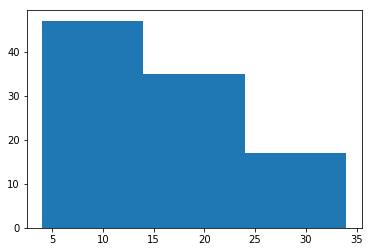

In [16]:
fig, axs = plt.subplots()
axs.hist(df2['% of 16 to 19 year-olds not in highschool and not highschool graduates'], bins=3)

(array([ 23.,  57.,  19.]),
 array([ 15.,  34.,  53.,  72.]),
 <a list of 3 Patch objects>)

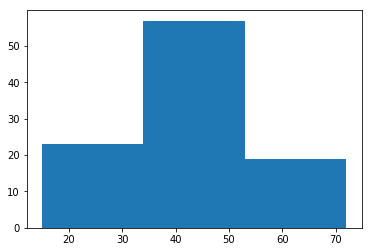

In [17]:
fig, axs = plt.subplots()
axs.hist(df2['25 only high school'], bins=3)

In [18]:
df3[['25 only high school',
     '% of People 25 Years+ with 4 or more Years of High School', 
     '% of 16 to 19 year-olds not in highschool and not highschool graduates', 
     '% of 18 to 24 year-olds in college', 
     '% of people 25 years+ with at least 4 years of college',
     'Annual Police Funding (Dollars per Resident)'
    ]].corr()
# Need to remove correlated variables (>=0.5 or <=-0.5)

,25 only high school,% of People 25 Years+ with 4 or more Years of High School,% of 16 to 19 year-olds not in highschool and not highschool graduates,% of 18 to 24 year-olds in college,% of people 25 years+ with at least 4 years of college,Annual Police Funding (Dollars per Resident)
25 only high school,1.000000,0.863059,-0.361431,-0.165077,0.217960,0.074414
% of People 25 Years+ with 4 or more Years of High School,0.863059,1.000000,-0.537162,0.182364,0.681072,0.120265
% of 16 to 19 year-olds not in highschool and not highschool graduates,-0.361431,-0.537162,1.000000,-0.626953,-0.513958,0.311526
% of 18 to 24 year-olds in college,-0.165077,0.182364,-0.626953,1.000000,0.591663,-0.277475
% of people 25 years+ with at least 4 years of college,0.217960,0.681072,-0.513958,0.591663,1.000000,0.124502
Annual Police Funding (Dollars per Resident),0.074414,0.120265,0.311526,-0.277475,0.124502,1.000000


In [19]:
df3[['25 only high school', 
     '% of 16 to 19 year-olds not in highschool and not highschool graduates', 
     'Annual Police Funding (Dollars per Resident)'
    ]].corr()
# No correlated predictors exist

,25 only high school,% of 16 to 19 year-olds not in highschool and not highschool graduates,Annual Police Funding (Dollars per Resident)
25 only high school,1.000000,-0.361431,0.074414
% of 16 to 19 year-olds not in highschool and not highschool graduates,-0.361431,1.000000,0.311526
Annual Police Funding (Dollars per Resident),0.074414,0.311526,1.000000


Coefficients:
[[  6.56921267  -7.15607376   4.62691258]
 [ -3.83894341 -14.24707938   7.67059587]
 [ 10.87691529  -9.576504     2.62668598]]
Mean Coeff:  [  4.53572818 -10.32655238   4.97473148]
Mean MSE: 23337.46 (+/- 21453.24)
Mean R2: 0.27 (+/- 0.42)


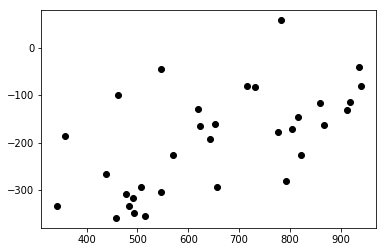

In [20]:
# Split the data into training/testing sets
train = df3[(df3['Crime Rate \n(per 1M Residents)']<1000)]
train = train[(train['% of 16 to 19 year-olds not in highschool and not highschool graduates']>10) &
              (train['% of 16 to 19 year-olds not in highschool and not highschool graduates']<30)]
train = train[(train['Annual Police Funding (Dollars per Resident)']>25) & 
                  (train['Annual Police Funding (Dollars per Resident)']<70)]

x_train = train.loc[:,['% of 16 to 19 year-olds not in highschool and not highschool graduates',
                         '25 only high school',
                         'Annual Police Funding (Dollars per Resident)'
                        ]]
y_train = train.loc[:,'Crime Rate \n(per 1M Residents)']

# Create linear regression object
regr = linear_model.LinearRegression()

# Generate training and testing indices for a given fold
n_folds=3
kf = KFold(n_folds)
kf.get_n_splits(x_train)

# Create arrays to store model results from each fold
coeff = np.empty([n_folds, x_train.shape[1]], dtype=float)
r2 = np.empty(n_folds, dtype=float)
mse = np.empty(n_folds, dtype=float)

i = 0
for traincv, testcv in kf.split(x_train):
        #test model on a single fold after fitting model on remaining folds
        y_pred = regr.fit(x_train.iloc[traincv], y_train.iloc[traincv]).predict(x_train.iloc[testcv])
        coeff[i] = regr.coef_
        r2[i] = r2_score(y_train.iloc[testcv], y_pred)
        mse[i] = mean_squared_error(y_train.iloc[testcv], y_pred)
        i += 1

print("Coefficients:")
print(coeff)
print("Mean Coeff: ", coeff.mean(axis=0))
#print(mse)
print("Mean MSE: %0.2f (+/- %0.2f)" % (mse.mean(), mse.std() * 2))
print("Mean R2: %0.2f (+/- %0.2f)" % (r2.mean(), r2.std() * 2))

# Compute predictions on entire training data using the coefficient matrix
y_pred = np.matmul(x_train, coeff.mean(axis=0))

# Plot actual vs predicted values and check for closeness to linearity (y=x line)
plt.scatter(y_train, y_pred,  color='black')

In [21]:
# I also considered polynomial and interaction effects, but R2 was not good enough on validation set
# Final equation: (Crime rate) = 4.5 * ('% of 16 to 19 year-olds not in highschool and not highschool graduates') 
#                                 - 10.3 * ('25 only high school') 
#                                 + 5 * ('Annual Police Funding (Dollars per Resident)')